# PEAS Framework

Imagine you want to build a robot. Where do you start? What questions do you ask?

- "What should it do?" - Too vague
- "How does it work?" - Too detailed, too early
- "What sensors does it need?" - Jumping ahead

**PEAS solves this:** It's a structured checklist that forces you to think through EVERY critical decision before writing a single line of code.

## What is PEAS?

**P**erformance measure: **How do we measure success?**  
**E**nvironment: **What world does the agent live in?**  
**A**ctuators: **How can the agent change the world?**  
**S**ensors: **What can the agent perceive?**

## Why This Order Matters

1. **Performance first** - If you don't know what "winning" means, you can't design anything
2. **Environment second** - The world determines what's possible
3. **Actuators third** - What actions can actually affect this world?
4. **Sensors last** - What information do we need to make those actions effective?

**Example: Flappy Bird AI Agent**

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import clear_output
import time

%matplotlib inline

## PEAS Analysis: Flappy Bird AI

Let's design a very simple AI agent that plays Flappy Bird. We'll use PEAS to think through EVERY decision.

| Component | Description | Why It Matters |
|-----------|-------------|----------------|
| **Performance** | Score (pipes cleared), survival time | Defines success - without this, the agent has no goal |
| **Environment** | 2D game world, gravity, moving pipes | Defines constraints - what physics/rules the agent must work within |
| **Actuators** | Jump command (flap wings) | Defines capabilities - the ONLY way the agent can change its fate |
| **Sensors** | Bird Y-position, pipe X/Y, velocity | Defines perception - the ONLY information the agent can use to decide |

### The Critical Insight

**Notice what's missing:** The agent CANNOT:
- See the entire screen at once (sensors are limited)
- Move left/right (only has jump actuator)
- Change gravity (environment constraint)
- "Try harder" to get more points (performance is objective)

PEAS framework makes limitations explicit. You can't add features the agent doesn't have.

In [2]:
# ENVIRONMENT: The game world
class FlappyBirdEnvironment:
    def __init__(self):
        self.bird_y = 5.0          # Bird vertical position
        self.bird_velocity = 0.0   # Bird falling speed
        self.pipe_x = 10.0         # Pipe horizontal position
        self.pipe_gap_y = 5.0      # Center of gap in pipe
        self.score = 0
        self.alive = True
        
        # Environment constants
        self.gravity = -0.5
        self.jump_strength = 2.0
        self.pipe_speed = -0.8
        self.gap_size = 3.0
    
    # SENSORS: What the agent can perceive
    def get_sensor_data(self):
        """Returns the state that sensors can detect"""
        return {
            'bird_y': self.bird_y,
            'bird_velocity': self.bird_velocity,
            'pipe_x': self.pipe_x,
            'pipe_gap_y': self.pipe_gap_y,
            'distance_to_pipe': self.pipe_x
        }
    
    # ACTUATORS: How the agent affects the world
    def jump(self):
        """The ONLY action the agent can take"""
        self.bird_velocity = self.jump_strength
    
    def step(self):
        """Update environment physics"""
        # Apply gravity
        self.bird_velocity += self.gravity
        self.bird_y += self.bird_velocity
        
        # Move pipe
        self.pipe_x += self.pipe_speed
        
        # Reset pipe when it passes
        if self.pipe_x < 0:
            self.pipe_x = 10.0
            self.score += 1
        
        # Check collision (PERFORMANCE MEASURE)
        if self.bird_y < 0 or self.bird_y > 10:
            self.alive = False
        
        # Check if bird hits pipe
        if 0 < self.pipe_x < 1.5:
            gap_top = self.pipe_gap_y + self.gap_size / 2
            gap_bottom = self.pipe_gap_y - self.gap_size / 2
            if self.bird_y < gap_bottom or self.bird_y > gap_top:
                self.alive = False
    
    # PERFORMANCE MEASURE: How we evaluate success
    def get_performance(self):
        return {'score': self.score, 'alive': self.alive}

print("Environment created with PEAS components defined")

Environment created with PEAS components defined


## Building the ENVIRONMENT (the "E" in PEAS)

The environment is the world the agent lives in. It has:
- **State variables**: What's changing? (bird position, pipe position, score)
- **Physics/Rules**: How does the world evolve? (gravity, collision detection)
- **Boundaries**: What are the limits? (grid size, floor/ceiling)

**Why this matters:** The environment doesn't care about the agent. It just follows its rules. Gravity pulls the bird down whether the agent likes it or not.

In [3]:
# THE AGENT BRAIN: Connecting Sensors -> Decision -> Actuators
def flappy_bird_agent(sensors):
    """
    1. SENSORS provide information (inputs)
    2. Agent makes a decision (logic)
    3. Returns ACTUATOR command (output)
    
    The agent is the BRIDGE between sensing and acting.
    """
    # Read sensor data (SENSORS)
    bird_y = sensors['bird_y']
    pipe_gap_y = sensors['pipe_gap_y']
    
    # Make a decision (AGENT LOGIC)
    # Strategy: Stay slightly below the gap center
    # Jump when below target position
    if bird_y < pipe_gap_y - 0.8:
        # Choose action (ACTUATORS)
        return 'JUMP'
    
    return 'NO_ACTION'

print("Agent created - uses sensors to decide actuator actions")

Agent created - uses sensors to decide actuator actions


## Understanding SENSORS and ACTUATORS

### SENSORS (the "S" in PEAS): The Agent's Eyes

```python
def get_sensor_data(self):
    return {
        'bird_y': self.bird_y,           # Where am I vertically?
        'bird_velocity': self.bird_velocity,  # How fast am I falling?
        'pipe_gap_y': self.pipe_gap_y,   # Where's the safe zone?
    }
```

**Critical concept:** The agent ONLY knows what sensors tell it. It's blind to everything else. If there's no sensor for "future pipe positions," the agent can't plan for them.

### ACTUATORS (the "A" in PEAS): The Agent's Hands

```python
def jump(self):
    self.bird_velocity = self.jump_strength  # THE ONLY ACTION
```

**Critical concept:** The agent can ONLY affect the world through actuators. No matter how smart the agent is, if it only has a "jump" actuator, it can never move left or right.

**This is why PEAS matters:** It separates what the agent can KNOW (sensors) from what it can DO (actuators) from what it SHOULD achieve (performance).

In [4]:
# Visualization
def visualize(env):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 10)
    ax.set_facecolor('#87CEEB')  # Sky blue
    ax.set_aspect('equal')
    
    # Draw bird
    bird = patches.Circle((2, env.bird_y), 0.4, color='yellow', 
                          edgecolor='orange', linewidth=2, zorder=10)
    ax.add_patch(bird)
    
    # Draw pipe
    gap_top = env.pipe_gap_y + env.gap_size / 2
    gap_bottom = env.pipe_gap_y - env.gap_size / 2
    
    # Top pipe
    top_pipe = patches.Rectangle((env.pipe_x, gap_top), 1.5, 10 - gap_top,
                                  color='green', edgecolor='darkgreen', linewidth=2)
    ax.add_patch(top_pipe)
    
    # Bottom pipe
    bottom_pipe = patches.Rectangle((env.pipe_x, 0), 1.5, gap_bottom,
                                     color='green', edgecolor='darkgreen', linewidth=2)
    ax.add_patch(bottom_pipe)
    
    # Display performance measure
    perf = env.get_performance()
    status = 'ALIVE' if perf['alive'] else 'CRASHED'
    ax.text(6, 9.5, f"Score: {perf['score']} | {status}",
            fontsize=14, fontweight='bold', ha='center',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Flappy Bird AI - PEAS Framework Demo', fontsize=16, fontweight='bold')
    
    plt.tight_layout()
    return fig

print("Visualization ready")

Visualization ready


## Run the Simulation: Watch PEAS in Action

As you watch, observe the **PEAS cycle** repeating every frame:

1. **SENSORS** → Agent reads: bird position, gap position
2. **AGENT DECIDES** → If below gap center → choose to jump
3. **ACTUATORS** → Execute jump (or do nothing)
4. **ENVIRONMENT** → Updates physics (gravity, pipe movement)
5. **PERFORMANCE** → Score updates when pipes are cleared

**This loop never stops.** This is how ALL agents work - sense, decide, act, repeat.

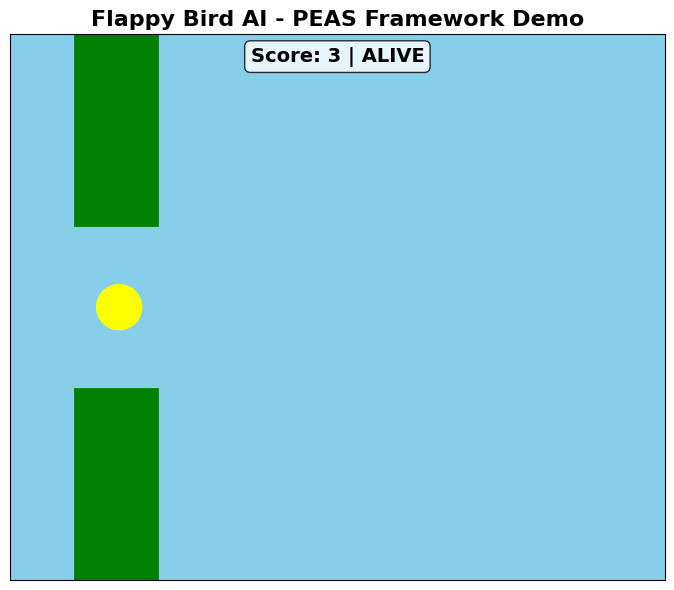


FINAL PERFORMANCE MEASURE
Score: 3 pipes cleared
Status: Success


In [5]:
# Run simulation
env = FlappyBirdEnvironment()
max_steps = 50

for step in range(max_steps):
    if not env.alive:
        break
    
    clear_output(wait=True)
    
    # Agent uses SENSORS to make decision
    sensor_data = env.get_sensor_data()
    action = flappy_bird_agent(sensor_data)
    
    # Agent uses ACTUATOR to affect environment
    if action == 'JUMP':
        env.jump()
    
    # Environment updates
    env.step()
    
    # Visualize
    fig = visualize(env)
    plt.show()
    time.sleep(0.1)
    plt.close()

# Final result
perf = env.get_performance()
print(f"\n{'='*50}")
print(f"FINAL PERFORMANCE MEASURE")
print(f"{'='*50}")
print(f"Score: {perf['score']} pipes cleared")
print(f"Status: {'Success' if perf['alive'] else 'Failed'}")
print(f"{'='*50}")

People jump straight to "I'll use machine learning!" without asking:
- What does success look like? (Performance)
- What's physically possible in this world? (Environment)
- What can the system actually DO? (Actuators)
- What information is available? (Sensors)

### Real-World Examples

**Self-Driving Car:**
- **P**: Safety (no crashes), efficiency (reach destination)
- **E**: Roads, traffic laws, other vehicles, weather
- **A**: Steering, acceleration, braking, signals
- **S**: Cameras, LIDAR, GPS, radar

**Spam Filter:**
- **P**: Accuracy (% of spam correctly identified)
- **E**: Email inbox, arriving messages
- **A**: Mark as spam, allow through, flag for review
- **S**: Email text, sender info, attachments, metadata

**Thermostat:**
- **P**: Maintain target temperature ± 2°F
- **E**: Room with heat loss/gain, people, windows
- **A**: Turn heater on/off, adjust fan speed
- **S**: Temperature sensor, time of day

### The Key Insight: Constraints Are Features

PEAS forces you to acknowledge constraints EARLY:
- "My robot can't fly" -> Design ground-based navigation
- "My sensor only updates once per second" -> Design for latency
- "My performance metric is ambiguous" -> Fix it before building

**Remember:** A well-defined problem with limited sensors/actuators beats an ill-defined problem with unlimited resources.

### Memorize This

When designing ANY agent system, always ask:
1. **P** - How do I MEASURE success?
2. **E** - What WORLD does this operate in?
3. **A** - What can it DO?
4. **S** - What can it SENSE?

Answer these four questions before writing ANY code.